In [49]:
# ===Jupyter notebook setup commands===
%reset -f
%reload_ext autoreload
%autoreload 2

# ===imports===
import os
import sys
import importlib
import numpy as np
import pandas as pd
from pathlib import Path
# === Setup ===
# Might need to change to main directory of MolFeatures - r'/your/path/to/MolFeatures'
ROOT_DIR = Path().resolve().parent
print(f"Setting ROOT_DIR to: {ROOT_DIR}")
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))
os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:
    from data_extractor import Molecules, extract_connectivity
    from morfeus_sterics import morfeus_results_to_df
    from feather_extractor import logs_to_feather
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    from help_functions import dict_to_horizontal_df, get_df_from_file, pick_samples_to_remove_for_distribution
    import help_functions
    import visualize
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
        
    )
    import plot
    
except ModuleNotFoundError as e:
    print(f"Module import failed: {e} \nPlease ensure all required modules are installed and available in the path specified on the right hand corner of the notebook.")
# === Config ===
pd.set_option('display.max_columns', None)
examples_path=ROOT_DIR / 'Getting_started_with_examples'
try:
    os.chdir(examples_path)  # Ensure working directory is examples_path
except : 
    print(f"Could not change directory to {examples_path}. Please ensure the path exists.")
    print(f"Current working directory: {os.getcwd()}")
    pass
   

Setting ROOT_DIR to: C:\Users\edens\Documents\GitHub\possible_dataset_info\second_sphere_dayalan
Could not change directory to C:\Users\edens\Documents\GitHub\possible_dataset_info\second_sphere_dayalan\Getting_started_with_examples. Please ensure the path exists.
Current working directory: C:\Users\edens\Documents\GitHub\possible_dataset_info\second_sphere_dayalan


In [17]:
## Bisphenol example - output
ddG_dict = {
    "Me": 0.545178102,
    "Et": 0.605535911,
    "Ph": 0.513320796,
    "Bn": 0.440848865,
    "iPr": 0.888718471,
    "tBu": 1.732739731,
    "Cy": 0.725235446,
    "CH2tBu": 0.584946549,
    "CHEt2": 1.123896008,
    "CH2iPr": 0.351085622,
    "CHPh2": 0.820407149,
    "1‐Ad": 1.713704329,
    "CCl3": 0.772767909,
    "4-MeO-Ph": 0.761095748,
    "4-tBu-Ph": 0.725235446,
    "CH2CF3": 0.749947626,
    "4-Et-Ph": 0.761095748,
    "5F-Ph": 0.018921159
}

bisphenol_mols= Molecules(r'C:\Users\edens\Documents\GitHub\possible_dataset_info\bisphenol_feather')

Molecules Loaded: ['1-Ad.feather', '4-Et-Ph.feather', '4-MeO-Ph.feather', '4-tBu-Ph.feather', '5F-Ph.feather', 'Bn.feather', 'CCl₃.feather', 'CHEt₂.feather', 'CHPh₂.feather', 'CH₂CF₃.feather', 'CH₂iPr.feather', 'CH₂tBu.feather', 'Cy.feather', 'Et.feather', 'iPr.feather', 'Me.feather', 'Ph.feather', 'tB14.feather'] Failed Molecules: []


In [9]:
sterimol = bisphenol_mols.get_sterimol_dict([11,27])
sterimol.head()

,B1_11-27,B5_11-27,L_11-27,loc_B5_11-27,B1_B5_angle_11-27
1-Ad,1.9907,4.8939,6.3666,2.2666,162.1097
4-Et-Ph,1.8028,3.2246,8.4893,4.0867,88.2051
4-MeO-Ph,1.7023,3.2289,8.4422,4.0825,92.7640
4-tBu-Ph,2.7485,3.4163,8.6276,5.8911,85.4788
5F-Ph,1.6998,3.8058,7.0046,4.2036,91.3009


In [10]:
os.chdir(r'C:\Users\edens\Documents\GitHub\possible_dataset_info\bisphenol_feather')
sterimol.to_csv('sterimol.csv', index=True)

In [20]:
benzoic_mols = Molecules(r'C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\feathers\re')

Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Error extracting energy value: float() argument must be a string or a number, not 'NoneType'
Molecules Loaded: ['m-CN_BA_renumbered.feather', 'm-OMe_BA_renumbered.

In [ ]:
## Milo Benzoic acid case study

measured_dict = {
    "4-CO2Me": 1.74,
    "4-MeO": 0.44,
    "4-Cl": 1.56,
    "4-COMe": 1.64,
    "Ph": 0.89,
    "3-MeO": 0.96,
    "4-tBu": 0.71,
    "4-F": 1.18,
    "3-CN": 2.30,
    "3-SO2Me": 2.23,
    "2-Me": 2.09,
    "1-naphthyl": 2.01
}

benzoic_mols = Molecules(r'C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\feathers')
benzoic_mols.get_renumbering_dict()
benzoic_mols.visualize_molecules([1,2,3])

Molecules Loaded: ['m-CN_BA.feather', 'm-OMe_BA.feather', 'm-SO2Me_BA.feather', 'o-Me_BA.feather', 'p-Cl_BA.feather', 'p-CO2Me_BA.feather', 'p-COMe_BA.feather', 'p-F_BA.feather', 'p-H_BA.feather', 'p-OMe_BA.feather', 'p-t-Bu_BA.feather'] Failed Molecules: []
No basic structure file provided, using the smallest file in the folder as the basic structure.
molecules is not valid
The basic structure path is C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\p-Cl_BA.xyz
Target index for renumbering is -1
Files to optimize: 11


Optimizing Molecules:   0%|          | 0/11 [00:00<?, ?it/s]C:\Users\edens\Documents\GitHub\‏‏LabCode_backup\MolFeatures\MolAlign\RDKIT_utils.py:187: UserWarning:

Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Cross.cpp:66.)



Optimizing C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\m-CN_BA.xyz... (1/11)
idx is 0, target_idx is -1
search for MCS...


Optimizing Molecules:   9%|▉         | 1/11 [00:02<00:29,  2.93s/it]

coords mapping is {2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 1, 8: 7, 9: 9, 10: 8, 11: 11, 12: 12, 13: 13}
Successfully optimized C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\m-CN_BA.xyz. Mapping: {'p-Cl_BA': {2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 1, 8: 7, 9: 9, 10: 8, 11: 11, 12: 12, 13: 13}}
Optimizing C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\m-OMe_BA.xyz... (2/11)
idx is 1, target_idx is -1
search for MCS...


Optimizing Molecules:  18%|█▊        | 2/11 [00:03<00:15,  1.71s/it]

coords mapping is {2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 1, 8: 7, 9: 9, 10: 8, 14: 11, 15: 12, 16: 13}
Successfully optimized C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\m-OMe_BA.xyz. Mapping: {'p-Cl_BA': {2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 1, 8: 7, 9: 9, 10: 8, 14: 11, 15: 12, 16: 13}}
Optimizing C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\m-SO2Me_BA.xyz... (3/11)
idx is 2, target_idx is -1
search for MCS...


Optimizing Molecules:  27%|██▋       | 3/11 [00:04<00:10,  1.27s/it]

coords mapping is {4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 1, 10: 7, 11: 8, 12: 9, 16: 11, 17: 12, 18: 13, 20: 14}
Successfully optimized C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\m-SO2Me_BA.xyz. Mapping: {'p-Cl_BA': {4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 1, 10: 7, 11: 8, 12: 9, 16: 11, 17: 12, 18: 13, 20: 14}}
Optimizing C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\o-Me_BA.xyz... (4/11)
idx is 3, target_idx is -1
search for MCS...


Optimizing Molecules:  36%|███▋      | 4/11 [00:05<00:07,  1.10s/it]

coords mapping is {1: 3, 2: 2, 3: 1, 4: 6, 5: 5, 6: 4, 7: 7, 8: 9, 9: 8, 13: 10, 15: 13, 16: 12}
Successfully optimized C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\o-Me_BA.xyz. Mapping: {'p-Cl_BA': {1: 3, 2: 2, 3: 1, 4: 6, 5: 5, 6: 4, 7: 7, 8: 9, 9: 8, 13: 10, 15: 13, 16: 12}}
Skipping basic file
Optimizing C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\p-CO2Me_BA.xyz... (6/11)
idx is 5, target_idx is -1
search for MCS...


Optimizing Molecules:  55%|█████▍    | 6/11 [00:06<00:03,  1.40it/s]

coords mapping is {4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7, 11: 9, 12: 8, 16: 10, 17: 11, 18: 12, 19: 13}
Successfully optimized C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\p-CO2Me_BA.xyz. Mapping: {'p-Cl_BA': {4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7, 11: 9, 12: 8, 16: 10, 17: 11, 18: 12, 19: 13}}
Optimizing C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\p-COMe_BA.xyz... (7/11)
idx is 6, target_idx is -1
search for MCS...


Optimizing Molecules:  64%|██████▎   | 7/11 [00:06<00:02,  1.46it/s]

coords mapping is {3: 1, 4: 6, 5: 5, 6: 4, 7: 3, 8: 2, 9: 7, 10: 8, 11: 9, 15: 13, 16: 12, 17: 11, 18: 10, 19: 14}
Successfully optimized C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\p-COMe_BA.xyz. Mapping: {'p-Cl_BA': {3: 1, 4: 6, 5: 5, 6: 4, 7: 3, 8: 2, 9: 7, 10: 8, 11: 9, 15: 13, 16: 12, 17: 11, 18: 10, 19: 14}}
Optimizing C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\xyz_files\p-F_BA.xyz... (8/11)
idx is 7, target_idx is -1
search for MCS...


Optimizing Molecules:  73%|███████▎  | 8/11 [00:07<00:01,  1.50it/s]

In [50]:


output_by_name = {
    "NO2-3_renumbered": 1.13,   # 3-NO2
    "I-4_renumbered": 2.27,     # 4-I
    "I-3_renumbered": 1.60,     # 3-I
    "F-4_renumbered": 2.27,     # 4-F
    "F-3_renumbered": 2.27,     # 3-F
    "Cl-m_renumbered": 1.51,    # 3,5-Cl
    "Cl-4_renumbered": 2.27,    # 4-Cl
    "Cl-3_renumbered": 2.13,    # 3-Cl
    "COOMe-4_renumbered": 2.08, # 4-COOMe
    "COOMe-3_renumbered": 1.63, # 3-COOMe
    "CN-4_renumbered": 1.55,    # 4-CN
    "CF3-4_renumbered": 2.13,   # 4-CF3
    "CF3-3_renumbered": 1.22,   # 3-CF3
    "Br-m_renumbered": 1.26,    # 3,5-Br
    "Br-4_renumbered": 2.44,    # 4-Br
    "Br-3": 1.85,               # 3-Br
}

output_list = output_by_name.values()


sphere_mols= Molecules(r'C:\Users\edens\Documents\GitHub\possible_dataset_info\second_sphere_dayalan\feather_for_paper\renumbered')

Molecules Loaded: ['Br-3.feather', 'Br-4_renumbered.feather', 'Br-m_renumbered.feather', 'CF3-3_renumbered.feather', 'CF3-4_renumbered.feather', 'Cl-3_renumbered.feather', 'Cl-4_renumbered.feather', 'Cl-m_renumbered.feather', 'CN-4_renumbered.feather', 'COOMe-3_renumbered.feather', 'COOMe-4_renumbered.feather', 'F-3_renumbered.feather', 'F-4_renumbered.feather', 'I-3_renumbered.feather', 'I-4_renumbered.feather', 'NO2-3_renumbered.feather'] Failed Molecules: []


In [51]:
## Secondary sphere notebook
answers_dict = {
    "Ring Vibration atoms - by order -> Pick one  atom from a six member ring\n example: 13": [4],
    "Stretch Threshold": [1600],
    "Stretching Vibration atoms- enter bonded atom pairs: \n example: 1,2 4,5": [[10,11]],
    "Bend Threshold": [1400],
    "Bending Vibration atoms - enter atom pairs that have a common atom: \n example: 4,7": [],
    "Center_Atoms Dipole": [],
    "Dipole atoms - indices for coordination transformation: \n example: 4,5,6 - origin, y-axis, new xy plane": [[10,4,3]],
    "Sub-Atoms NPA": [] ,
    "NPA manipulation atoms - Insert atoms to show NPA: \n example: 1,2,4": [],
    "charges values - Insert atoms to show charge: \n example: 1,2,3,4": [4,10],
    "charge_diff - Insert atoms to show charge difference: \n example: 1,2 3,4": [],
    "Sterimol atoms - Primary axis along: \n example: 7,8": [[10,4]],
    'drop_atoms - Atoms to drop: \n example: 1,2,3': [],
    "Bond_length - Atom pairs to calculate difference: \n example: 1,2 4,5": [[4,10],[10,11]],    
    'Bond_angle - Atom triplets to calculate difference: \n example: 1,2,3 4,5,6': [[12,10,11],[12,10,11,4]],
}
current_dir=os.getcwd()
json_path=os.path.join(current_dir,'second_sphere_input.json')
help_functions.save_input_json(answers_dict, json_path=json_path)
df=sphere_mols.get_molecules_features_set(entry_widgets=answers_dict,answers_list=None, save_as=True,csv_file_name='features_second_sphere')
df['output']=output_list
print(df.head())

Input saved to C:\Users\edens\Documents\GitHub\possible_dataset_info\second_sphere_dayalan\feather_for_paper\second_sphere_input.json
Calculating stretch vibration for atoms [[10, 11]] with threshold 1600 
 Remember : ALWAYS LOOK AT THE RESULTING VIBRATION


interactive(children=(FloatSlider(value=0.9, description='Threshold', max=1.0, step=0.01), Output()), _dom_cla…

Features saved to features_second_sphere_20251018_215636.csv and correlation table to features_second_sphere_20251018_215636_correlation_table.csv in C:\Users\edens\Documents\GitHub\possible_dataset_info\second_sphere_dayalan\feather_for_paper
                      cross  cross_angle       para  para_angle  \
NO2-3_renumbered  1656.5418    20.372027  1669.1607   84.323742   
I-4_renumbered    1641.8462    18.818061  1659.0566   69.992042   
I-3_renumbered    1643.0434    32.714617  1661.6286   59.322318   
F-4_renumbered    1669.0566    16.822375  1679.3198   73.670128   
F-3_renumbered    1672.1278    21.636705  1683.1186   69.557788   

                  Frequency_Stretch_10_11  Amplitude_Stretch_10_11  \
NO2-3_renumbered                1850.6057                 1.474911   
I-4_renumbered                  1842.1913                 0.620274   
I-3_renumbered                  1844.8077                 1.473483   
F-4_renumbered                  1840.2009                 0.610278   
F-3

In [ ]:
regression_model = LinearRegressionModel(df, process_method='one csv', y_value='output',
                                        leave_out=None, min_features_num=3,
                                        max_features_num=3, metrics=None, return_coefficients=False)

Reusing existing run directory: runs\in_memory_dataset_output_linear_20251018
Database already exists at: C:\Users\edens\Documents\GitHub\possible_dataset_info\second_sphere_dayalan\feather_for_paper\runs\in_memory_dataset_output_linear_20251018\db\results_in_memory_dataset.db
Table 'regression_results' has been ensured to exist.
linear model selected
Processed DataFrame
Names column: <index> | Target: output
Rows: 16 | Features: 27 â 27


interactive(children=(FloatSlider(value=0.9, continuous_update=False, description='|r| ≥', max=1.0, step=0.01)…

--- Correlation Report ---
Features with |r| > 0.8:
['Frequency_Stretch_10_11', 'angle_[12, 10, 11]', 'bond_length_10-11', 'bond_length_4-10', 'cm5_atom_10', 'cm5_atom_4', 'cross_angle', 'hirshfeld_atom_10', 'hirshfeld_atom_4', 'nbo_atom_4', 'para_angle']
VIF pruning skipped by user/preference.


Using 1 jobs for evaluation. Found 20 cores.
Loaded 2925 existing results from DB.
Combos to run: 0, done_combos: 2925
No new combinations to evaluate at threshold 0.700.


c:\Users\edens\anaconda3\envs\labenv\lib\site-packages\adjustText\__init__.py:367: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.

C:\Users\edens\Documents\GitHub\‏‏LabCode_backup\MolFeatures\M3_modeler\plot.py:423: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.

C:\Users\edens\Documents\GitHub\‏‏LabCode_backup\MolFeatures\M3_modeler\plot.py:423: UserWarning:

The figure layout has changed to tight



[PDF] Skipping top-5 export due to error: 'LinearRegressionModel' object has no attribute 'molecules_names'
| formula                                                                |     R.sq |     Q.sq |      MAE |   Model_id |
|:-----------------------------------------------------------------------|---------:|---------:|---------:|-----------:|
| ('dipole_x_10-4-3', 'B1_B5_angle_10-4', 'angle_[12, 10, 11]')          | 0.869236 | 0.790814 | 0.169216 |          0 |
| ('nbo_atom_4', 'hirshfeld_atom_10', 'B1_B5_angle_10-4')                | 0.850946 | 0.778859 | 0.160603 |          1 |
| ('nbo_atom_4', 'cm5_atom_10', 'B1_B5_angle_10-4')                      | 0.848273 | 0.776817 | 0.16166  |          2 |
| ('B1_B5_angle_10-4', 'angle_[12, 10, 11]', 'dihedral_[12, 10, 11, 4]') | 0.858557 | 0.771703 | 0.171659 |          3 |
| ('B1_10-4', 'B1_B5_angle_10-4', 'angle_[12, 10, 11]')                  | 0.856071 | 0.768512 | 0.177361 |          4 |
| ('dipole_z_10-4-3', 'B1_B5_angle_10-4', 'an

c:\Users\edens\anaconda3\envs\labenv\lib\site-packages\adjustText\__init__.py:367: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.

C:\Users\edens\Documents\GitHub\‏‏LabCode_backup\MolFeatures\M3_modeler\plot.py:423: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.

C:\Users\edens\Documents\GitHub\‏‏LabCode_backup\MolFeatures\M3_modeler\plot.py:423: UserWarning:

The figure layout has changed to tight



Exiting model selection.


,id,combination,r2,q2,mae,rmsd,threshold,model,predictions
1439,1440,"('dipole_x_10-4-3', 'B1_B5_angle_10-4', 'angle...",0.869236,0.790814,0.169216,0.192804,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.18278415 2.3159084 1.92535987 2.48653981 2...
1955,1956,"('nbo_atom_4', 'hirshfeld_atom_10', 'B1_B5_ang...",0.850946,0.778859,0.160603,0.198237,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.17116425 2.21470548 1.95556099 2.4567578 2...
1978,1979,"('nbo_atom_4', 'cm5_atom_10', 'B1_B5_angle_10-4')",0.848273,0.776817,0.161660,0.199151,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.16788477 2.21546304 1.96229824 2.45384241 2...
2565,2566,"('B1_B5_angle_10-4', 'angle_[12, 10, 11]', 'di...",0.858557,0.771703,0.171659,0.201419,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.31593276 2.21345674 1.98412003 2.49041519 2...
2459,2460,"('B1_10-4', 'B1_B5_angle_10-4', 'angle_[12, 10...",0.856071,0.768512,0.177361,0.202822,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.29244734 2.28571962 1.93584736 2.47631635 2...
1763,1764,"('dipole_z_10-4-3', 'B1_B5_angle_10-4', 'angle...",0.863617,0.768034,0.173748,0.203031,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.23285845 2.22297055 1.98061275 2.50110133 2...
2295,2296,"('hirshfeld_atom_10', 'B1_B5_angle_10-4', 'bon...",0.842874,0.747385,0.175560,0.211875,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.24094027 2.19260457 2.00800361 2.44435823 2...
2019,2020,"('nbo_atom_4', 'B1_B5_angle_10-4', 'angle_[12,...",0.862416,0.744569,0.177776,0.213053,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.22416518 2.26522457 1.97004024 2.38743027 2...
1610,1611,"('dipole_y_10-4-3', 'B1_B5_angle_10-4', 'angle...",0.850091,0.744499,0.172994,0.213082,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.35101437 2.28170834 1.97626457 2.45526884 2...
1950,1951,"('nbo_atom_4', 'hirshfeld_atom_10', 'cm5_atom_...",0.820812,0.739024,0.163803,0.215353,0.7,<modeling.LinearRegressionModel object at 0x00...,[1.09278931 2.17429403 1.86337116 2.44500277 2...


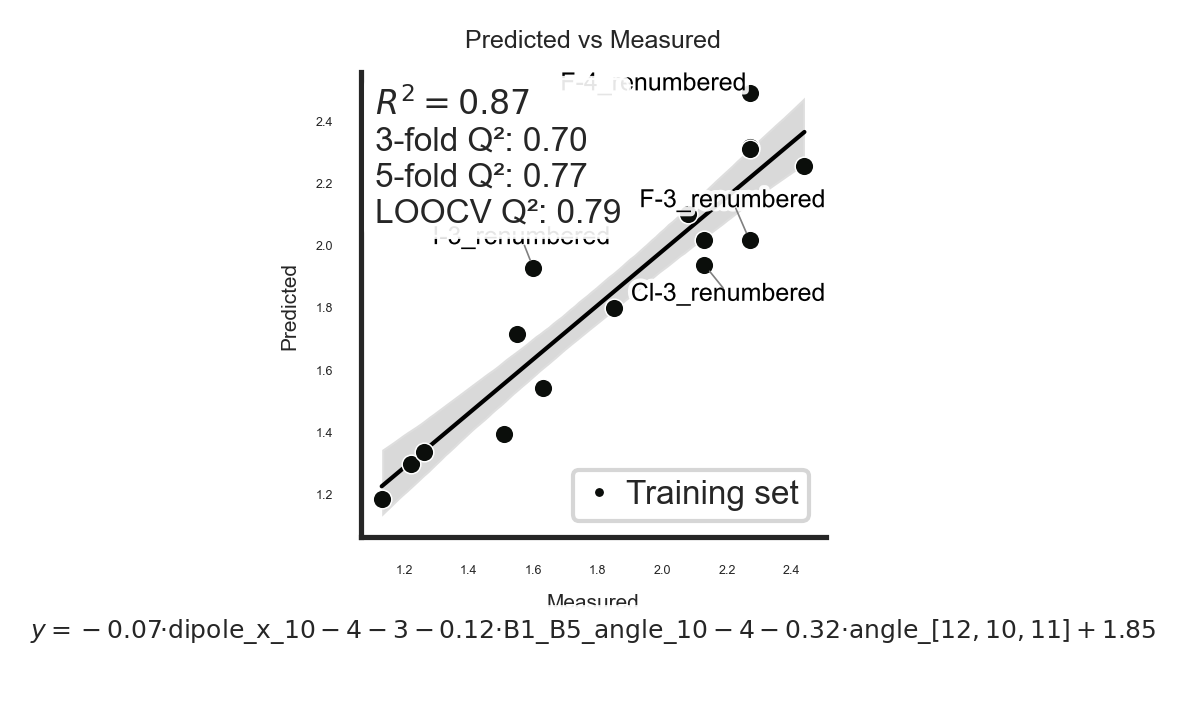

In [41]:
regression_model.search_models()

In [ ]:
plot.run_single_combo_report(regression_model,['cm5_atom_12', 'angle_[11, 12, 5]']) 



In [56]:
## Milo Benzoic acid case study
measured_values = {
    "m-CN_BA": 2.30,
    "m-OMe_BA": 0.96,
    "m-SO2Me_BA": 2.23,
    "naphthyl_BA": 2.01,
    "o-Me_BA": 2.09,
    "p-Cl_BA": 1.56,
    "p-CO2Me_BA": 1.74,
    "p-COMe_BA": 1.64,
    "p-F_BA": 1.18,
    "p-H_BA": 0.89,
    "p-OMe_BA": 0.44,
    "p-t-Bu_BA": 0.71
}

output_list = measured_values.values()
benzoic_mols = Molecules(r'C:\Users\edens\Documents\GitHub\possible_dataset_info\milo_benzoic_acids\feathers')
print(benzoic_mols.molecule_names)

Molecules Loaded: ['m-CN_BA.feather', 'm-OMe_BA.feather', 'm-SO2Me_BA.feather', 'naphthyl_BA.feather', 'o-Me_BA.feather', 'p-Cl_BA.feather', 'p-CO2Me_BA.feather', 'p-COMe_BA.feather', 'p-F_BA.feather', 'p-H_BA.feather', 'p-OMe_BA.feather', 'p-t-Bu_BA.feather'] Failed Molecules: []
['m-CN_BA', 'm-OMe_BA', 'm-SO2Me_BA', 'naphthyl_BA', 'o-Me_BA', 'p-Cl_BA', 'p-CO2Me_BA', 'p-COMe_BA', 'p-F_BA', 'p-H_BA', 'p-OMe_BA', 'p-t-Bu_BA']


In [57]:
benzoic_mols.visualize_molecules([1,2,3])

In [ ]:
## Benzoic Surrogate notebook
answers_dict = {
    "Ring Vibration atoms - by order -> Pick one  atom from a six member ring\n example: 13": [4],
    "Stretch Threshold": [1600],
    "Stretching Vibration atoms- enter bonded atom pairs: \n example: 1,2 4,5": [[7,8]],
    "Bend Threshold": [1400],
    "Bending Vibration atoms - enter atom pairs that have a common atom: \n example: 4,7": [],
    "Center_Atoms Dipole": [],
    "Dipole atoms - indices for coordination transformation: \n example: 4,5,6 - origin, y-axis, new xy plane": [[2,1,7]],
    "Sub-Atoms NPA": [] ,
    "NPA manipulation atoms - Insert atoms to show NPA: \n example: 1,2,4": [],
    "charges values - Insert atoms to show charge: \n example: 1,2,3,4": [7,1,8],
    "charge_diff - Insert atoms to show charge difference: \n example: 1,2 3,4": [],
    "Sterimol atoms - Primary axis along: \n example: 7,8": [[7,1]],
    'drop_atoms - Atoms to drop: \n example: 1,2,3': [],
    "Bond_length - Atom pairs to calculate difference: \n example: 1,2 4,5": [[9,10],[7,8]],    
    'Bond_angle - Atom triplets to calculate difference: \n example: 1,2,3 4,5,6': [[1,7,8],[7,1,2,6]],
}
current_dir=os.getcwd()
json_path=os.path.join(current_dir,'second_sphere_input.json')
help_functions.save_input_json(answers_dict, json_path=json_path)
df=sphere_mols.get_molecules_features_set(entry_widgets=answers_dict,answers_list=None, save_as=True,csv_file_name='features_second_sphere')
df['output']=output_list
print(df.head())